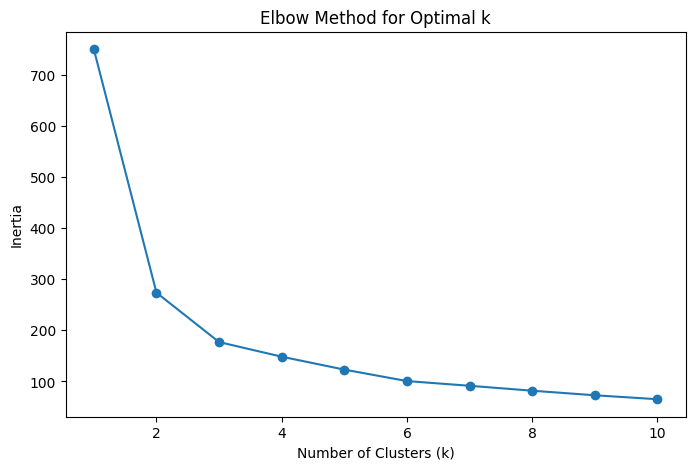

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df= pd.read_csv("Iris.csv")
df.head()

# Assuming 'data' is a typo and should be 'df' as loaded above
# Also, the code selects numeric types but then hardcodes columns.
# I will include both as they appear in the file.
data = df # Correcting 'data' to use the loaded 'df'
X = data.select_dtypes (include=[float, int])

x_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] #x
y_data = df['Species']
x_data

# Standardize the data
# Note: The code scales 'X' from In[27] but should probably scale 'x_data' from In[14]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use elbow method to find optimal number of clusters
inertia = []
k_range = range (1, 11)

for k in k_range:
 kmeans = KMeans(n_clusters =k, random_state =42, n_init=10)
 kmeans.fit(X_scaled)
 inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize =(8,5))
plt.plot(k_range, inertia, marker ='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., 3 for Iris dataset)
kmeans = KMeans (n_clusters =3, random_state =42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster Labels to the original data for visualization or analysis
data['Cluster'] = clusters
data.head()